### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder as le

### Import dan Cek Dataset

In [3]:
df_fruit = pd.read_excel('fruit.xlsx')
df_fruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [4]:
print("Data Shape : ",df_fruit.shape)

Data Shape :  (10000, 6)


In [5]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [6]:
df_fruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [7]:
df_fruit.isnull().sum()

diameter    0
weight      0
red         0
green       0
blue        0
name        0
dtype: int64

In [8]:
df_fruit['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

In [11]:
encoder = le()
df_fruit['name'] = encoder.fit_transform(df_fruit['name'])
df_fruit['name'].value_counts()

name
1    5000
0    5000
Name: count, dtype: int64

### Visualisasi Data

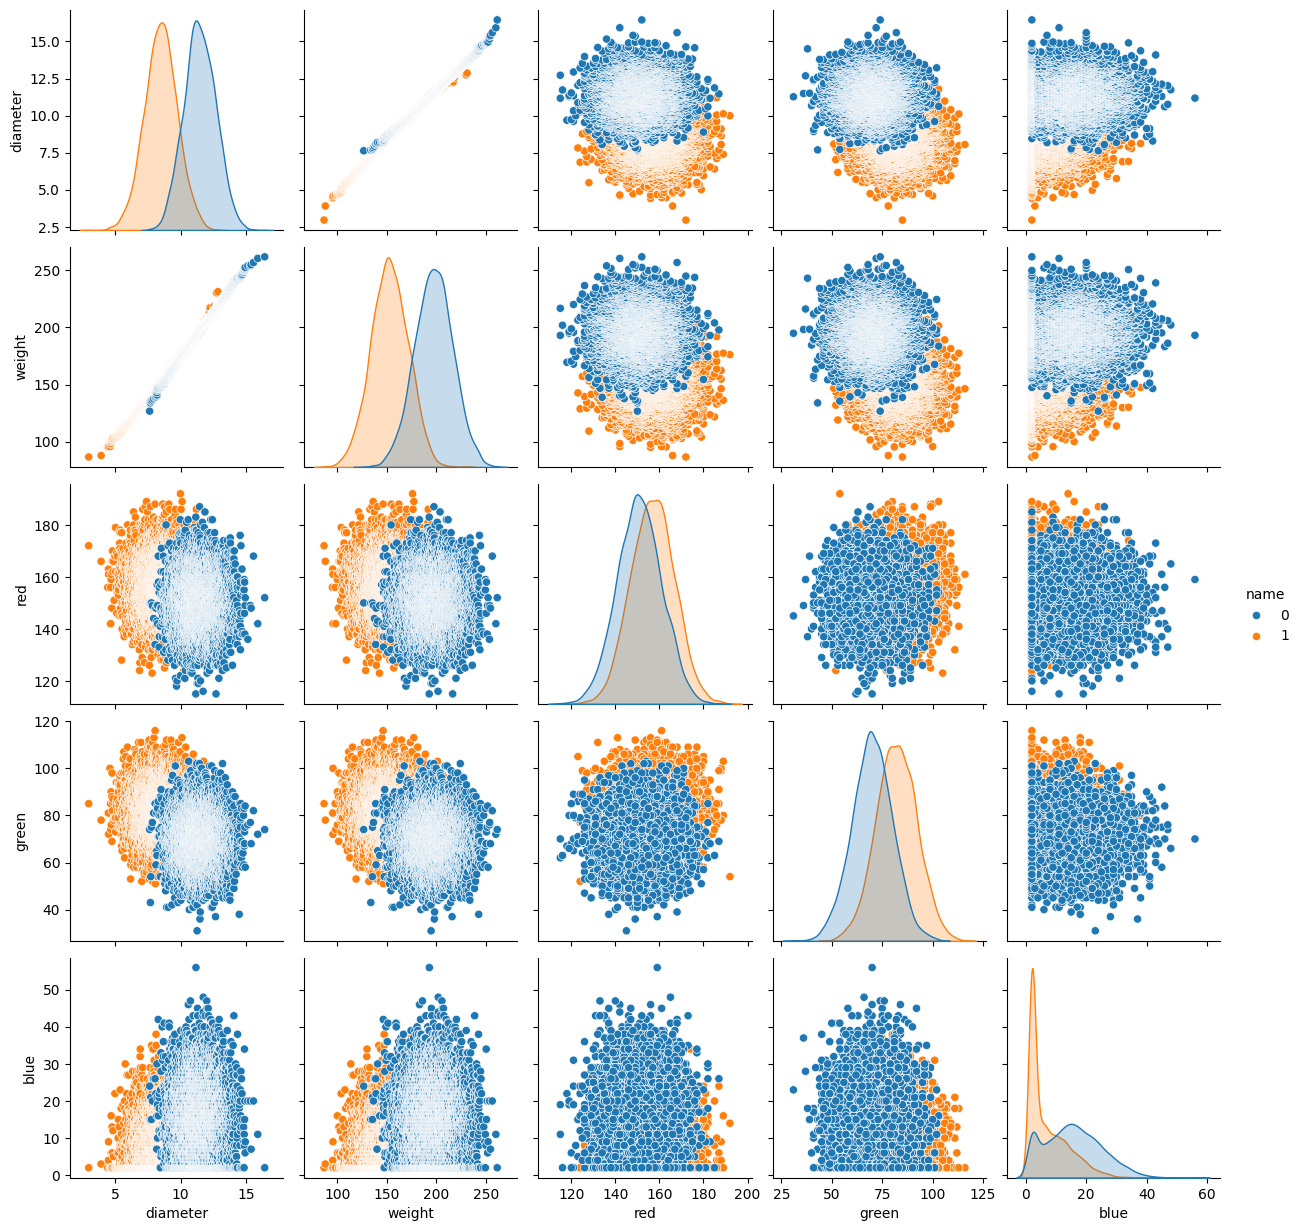

In [12]:
sb.pairplot(df_fruit, hue='name')

Text(0.5, 1.0, 'Jumlah masing-masing nama buah')

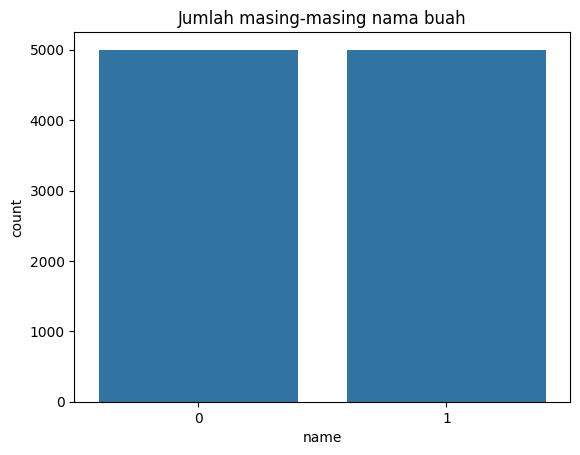

In [13]:
sb.countplot(data=df_fruit, x='name').set_title("Jumlah masing-masing nama buah")

In [14]:
df_fruit.corr()

,diameter,weight,red,green,blue,name
diameter,1.000000,0.999476,-0.217821,-0.396832,0.363307,-0.770768
weight,0.999476,1.000000,-0.214714,-0.392003,0.358916,-0.761567
red,-0.217821,-0.214714,1.000000,0.148937,-0.135900,0.286127
green,-0.396832,-0.392003,0.148937,1.000000,-0.242495,0.510564
blue,0.363307,0.358916,-0.135900,-0.242495,1.000000,-0.468832
name,-0.770768,-0.761567,0.286127,0.510564,-0.468832,1.000000


<Axes: >

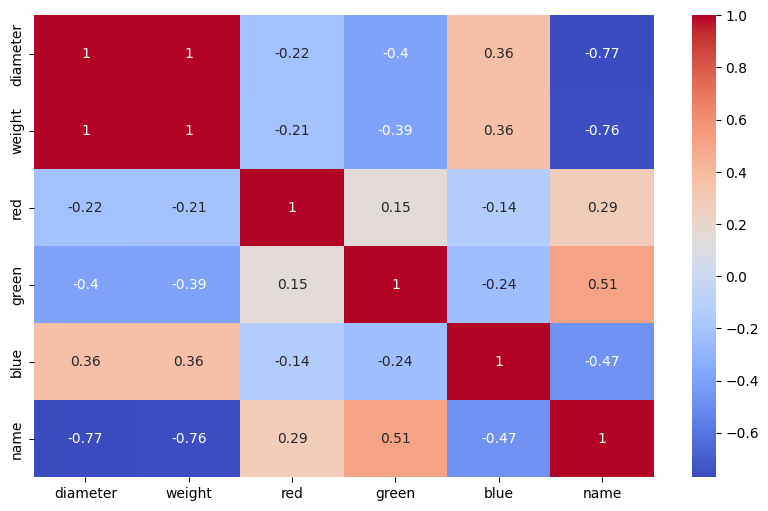

In [19]:
plt.figure(figsize=(10,6))
sb.heatmap(df_fruit.corr(), annot=True, cmap='coolwarm')

### Train Test Split

In [22]:
x = df_fruit.drop('name', axis = 1)
y = df_fruit['name']

In [23]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 20% = 95.40%
# 25% = 95.24%
# 30% = 95.50%
# 35% = 95.26%

### Modeling,Evaluasi,dan Prediksi

In [69]:
klasifikasi = SVC(kernel='linear')
klasifikasi.fit(x_train, y_train)

y_pred = klasifikasi.predict(x_test)
CLF = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Nilai Akurasi SVM : {:.2f}".format(CLF*100))

# linear = 95.50%
# rbf = 93.17%
# poly = 92.47%
# sigmoid = 91.00%

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1489
           1       0.98      0.93      0.95      1511

    accuracy                           0.95      3000
   macro avg       0.96      0.96      0.95      3000
weighted avg       0.96      0.95      0.95      3000

Nilai Akurasi SVM : 95.50


### Test Data dan Buat Model

In [84]:
new_data = {
    'diameter': [1.5],
    'weight': [45],
    'red': [29],
    'green': [50],
    'blue': [20]}

new_data = pd.DataFrame(new_data)
new_data

,diameter,weight,red,green,blue
0,1.5,45,29,50,20


In [85]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = klasifikasi.predict(scaled_new_data)

print("Buah yang di prediksi termasuk buah :",y_pred_new)

Buah yang di prediksi termasuk buah : [1]


In [86]:
pickle.dump(klasifikasi, open('SVM_fruit.pkl', 'wb'))